In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## OPENCV - OPENING AND RESIZING

In [32]:
#FLAG 
# ID 1 COLOR
# ID 0 BYN
# ID -1 ALPHA

cv2.namedWindow('OpenCV Window', cv2.WINDOW_AUTOSIZE) #Resize from Window
image = cv2.imread("image/3.jpg", 0) #Read File
cv2.imshow("OpenCV Window", image) #Show File
cv2.imwrite("image/Image_Saved.jpg", image) #Save File

cv2.waitKey(0)
cv2.destroyAllWindows()

## OPENCV -  ADDING A LINE AND USING MATPLOTLIB

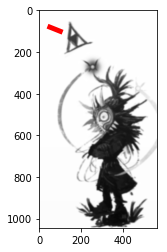

In [47]:
image_test = cv2.imread("image/2.jpg", 0)
plt.imshow(image_test, cmap="gray", interpolation="bicubic")
plt.plot([50,100],[80,100], 'r', linewidth=5)

plt.show()

#Interpolación es una técnica de recuperación de pixeles perdidos cuando se redimenciona una imagen

## OPENCV - ADD GEOMETRY TO IMAGE

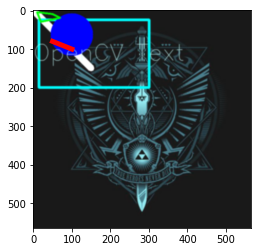

In [3]:
image = cv2.imread("image/3.jpg", 1)
cv2.line(image, (0,0), (150,150), (255,255,255), 15)
#(Imagen, Origen de la Linea, Fin de la Linea, Color(BGR), Ancho)
cv2.rectangle(image,(15,25), (300, 200), (0,255,255), 5)
cv2.circle(image, (100,63), 55, (0,0,255), -1)

pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32)
#pts = pts.reshape((-1,1,2))
cv2.polylines(image,[pts], True, (0,255,0), 3)

font= cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,'OpenCV Text', (0,130), font, 2, (200,255,255), 1, cv2.LINE_AA)

plt.imshow(image, cmap="gray", interpolation="bicubic")
plt.plot([50,100],[80,100], 'r', linewidth=5)

plt.show()

#cv2.imshow("OpenCV_Test", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## OPENCV - ROI MANIPUATION

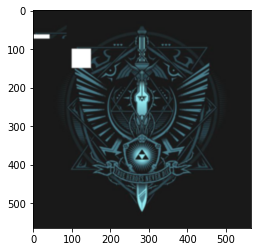

In [14]:
img = cv2.imread("image/3.jpg", 1)
img[55,55] = [255,255,255] # Pixel in [55,55] gonna be white
px = img[55,55]

#ROI - Region of Image
img[100:150, 100:150] = [255,255,255] #ROI gonna be White

roi_c = img[37:111, 107:194]
img[0:74, 0:87] = roi_c #copy of ROI in that section

plt.imshow(img, cmap="gray", interpolation="bicubic")
plt.show()

#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## OPENCV - MATH ON IMAGES

In [2]:
img1 = cv2.imread("image/1.jpg")
img2 = cv2.imread("image/2.jpg")

rows,cols,channels = img2.shape #Split  Shape in 3 Variables
roi = img1[0:rows, 0:cols] #Region gonna be 0 to shape row and col

img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # convert img2 to gray
ret, mask = cv2.threshold(img2gray, 100, 400, cv2.THRESH_BINARY_INV) #Return 2 values and create a threshold

mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

dst = cv2.add(img1_bg, img2_fg) #add img bg + img fg
img1[0:rows, 0:cols] = dst # set original image with add

cv2.imshow("test", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.imshow("img1_bg", img1_bg)
cv2.imshow("Mask", mask)
#cv2.imshow("dest", dst)
#cv2.imshow("img1", img1)

cv2.waitKey(0)
cv2.destroyAllWindows()

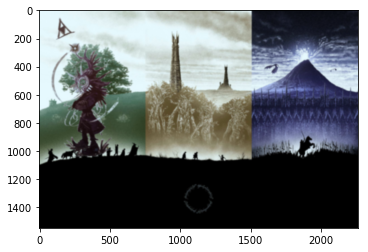

In [26]:
plt.imshow(img1, interpolation="bicubic")
plt.show()

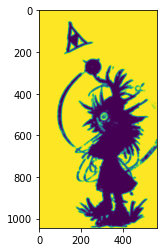

In [27]:
plt.imshow(mask_inv, interpolation="bicubic")
plt.show()

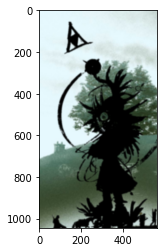

In [34]:
plt.imshow(img1_bg, interpolation="bicubic")
plt.show()

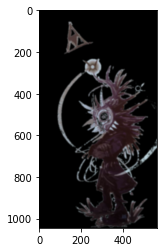

In [30]:
plt.imshow(img2_fg, interpolation="bicubic")
plt.show()







# OPENCV - TYPES THRESHOLD

In [49]:
img = cv2.imread("image/4.jpg")
ret, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY) #simple Threshold

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret2, threshold2 = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY) #simple threshold to grayscale

gaus = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

ret3, otsu = cv2.threshold(gray, 125, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)

In [40]:
cv2.imshow("original", img)
cv2.imshow("threshold", threshold)
cv2.imshow("threshold2", threshold2)
cv2.imshow("gaus", gaus)
cv2.imshow("otsu", otsu)

cv2.waitKey(0)
cv2.destroyAllWindows()

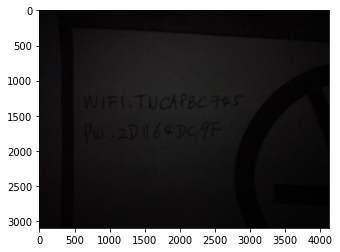

In [41]:
plt.imshow(img, interpolation="bicubic")
plt.show()

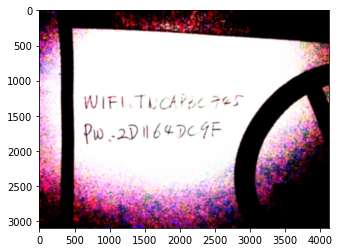

In [43]:
plt.imshow(threshold, interpolation="bicubic")
plt.show()

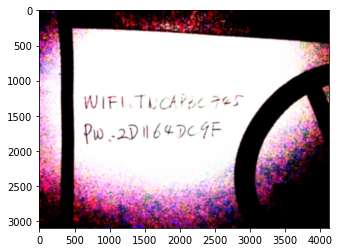

In [50]:
plt.imshow(threshold2, interpolation="bicubic")
plt.show()

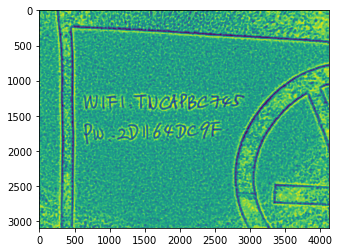

In [51]:
plt.imshow(gaus, interpolation="bicubic")
plt.show()

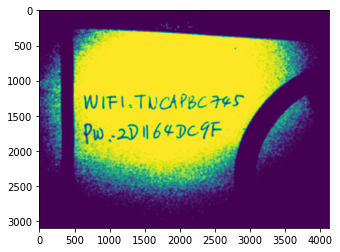

In [52]:
plt.imshow(otsu, interpolation="bicubic")
plt.show()

## OPENCV - COLOR FILTERING

In [3]:
img = cv2.imread('image/6.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#HSV - Hue Saturation Value
lower_red = np.array([50, 130, 150])
upper_red = np.array([150, 255, 220])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(img, img, mask=mask)

#Blurring and Smoothing
kernel = np.ones((15,15), np.float32) / 255

smooth = cv2.filter2D(res, -1, kernel)
blur = cv2.GaussianBlur(res,(5,15), 0)
median = cv2.medianBlur(res, 15)
bilateral = cv2.bilateralFilter(res, 15, 75, 75)


In [1]:
#SIMPLE RESULT OF FILTERING
cv2.imshow('Img', img)
cv2.imshow('mask', mask)
cv2.imshow('res', res)

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [12]:
#RESULT + BLUR / SMOOTH
cv2.imshow('res', res)
cv2.imshow('smooth', smooth)
cv2.imshow('blur', blur)
cv2.imshow('median', median)

cv2.imshow('bilateral', bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# CODE TO USE FOR CAMERA USE

#cap = cv2.Videocapture(0)
#while True:
# _, frame = cap.read();
#...
#...
# k = cv2.waitKey(5) & 0xFF
# if k == 27:
    #break;
#cv2.destroyAllWindows()
#cap.release()

## OPENCV - Morphological Transformation

In [9]:
kernel2 = np.ones((5,5), np.uint8)
erosion = cv2.erode(mask, kernel2, iterations=1)
dilation = cv2.dilate(mask, kernel2, iterations=1)

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel2)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel2)

In [10]:
#RESULT + BLUR / SMOOTH
cv2.imshow('erotion', erosion)
cv2.imshow('dilation', dilation)
cv2.imshow('opening', opening)
cv2.imshow('closing', closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

## OPENCV - EDGE DETECTION AND GRADIENTS

In [8]:
img = cv2.imread('image/6.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Gradients
laplician = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

#Edge Detector
edges = cv2.Canny(img, 200, 200)


cv2.imshow('original', img)
cv2.imshow('laplician', laplician)
cv2.imshow('sobelx', sobelx)
cv2.imshow('sobely', sobely)
cv2.imshow('edges', edges)
cv2.waitKey(0)


cv2.destroyAllWindows()

## OPENCV - TEMPLATE MATCHING

In [7]:
img_bgr = cv2.imread('image/z1.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

template = cv2.imread('image/z3.jpg',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0]+w, pt[1]+h), (0,255,255), 2)

cv2.imshow('Detected', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

## OPENCV - GRABCUT

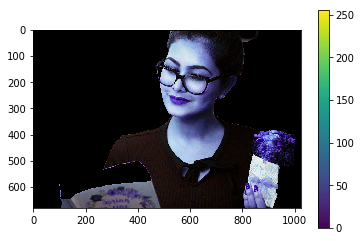

In [6]:
img = cv2.imread("image/grabcut.jpg", 1)
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64) 
fgdModel = np.zeros((1,65), np.float64)

rect = (100, 0, 900, 800)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

## OPENCV - CORNER DETECTION

In [3]:
img = cv2.imread("image/mosaic_dog.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)


for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img, (x,y), 3, 255, -1)
    
cv2.imshow('Corner', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## OPENCV - FEATURE DETECTION (HOMOGRAPHY) BRUTE FORCE

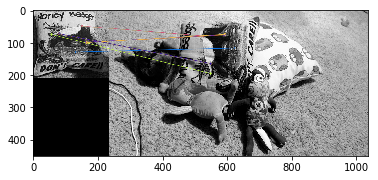

In [43]:
img1 = cv2.imread("image/feature_1.jpg", 0)
img2 = cv2.imread("image/feature_2.jpg", 0)

orb = cv2.ORB_create()
kp1, desc1 = orb.detectAndCompute(img1, None)
kp2, desc2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.imshow(img3)
plt.show()


## OPENCV - MOG Background Reduction

In [30]:
cap = cv2.VideoCapture('image/video_sample.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    
    cv2.imshow('original', frame)
    cv2.imshow('fg', fgmask)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\highgui\src\window.cpp:356: error: (-215) size.width>0 && size.height>0 in function cv::imshow


## OPENCV - HAAR CASCADE OBJECT DETECTION (FACE & EYE)

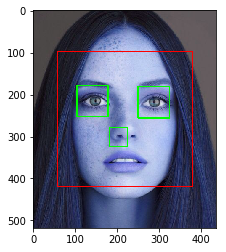

In [31]:
#https://github.com/opencv/opencv/tree/master/data/haarcascades﻿
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('image/frontface_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.2, 5)
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

#cv2.imshow('img', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(img)
plt.show()

## OPENCV - MAKING OWN HAAR CASCADE